In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Data_Privacy_Project/train.csv' #add csv file name 
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name_Similarity,Gender_Similarity,Matched
0,3.0,0.229972,1.0
1,13.0,0.511298,0.0
2,14.0,0.000000,1.0
3,13.0,1.414214,0.0
4,7.0,0.000000,1.0


Normalize similarity attributes

In [41]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [42]:
normalized_df

,Name_Similarity,Gender_Similarity,Matched
0,0.103448,0.162615,1.0
1,0.448276,0.361542,0.0
2,0.482759,0.000000,1.0
3,0.448276,1.000000,0.0
4,0.241379,0.000000,1.0
...,...,...,...
2995,0.172414,1.000000,0.0
2996,0.379310,0.000000,1.0
2997,0.448276,0.000000,0.0
2998,0.689655,0.000000,1.0


#DBSCAN

In [120]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


# X, labels_true = load_iris(return_X_y=True) 
X = normalized_df[['Name_Similarity','Gender_Similarity']]

clustering = DBSCAN(eps=0.05, min_samples=300).fit(X)
labels = clustering.labels_

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 1087


Estimated number of clusters: 3
Estimated number of noise points: 326
Homogeneity: 0.256
Completeness: 0.216
V-measure: 0.234
Adjusted Rand Index: 0.179
Adjusted Mutual Information: 0.234
Silhouette Coefficient: 0.682


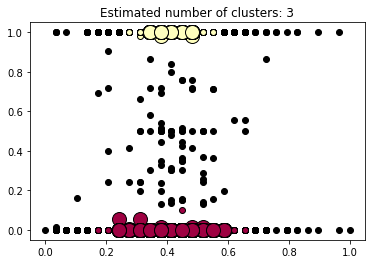

In [121]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
X = normalized_df[['Name_Similarity','Gender_Similarity']].to_numpy()
labels_true = normalized_df[['Matched']].to_numpy()
labels_true = labels_true.flat

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=300).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) 
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
labels.sum()

-1097

In [ ]:
normalized_df[['Matched']].to_numpy()

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

#K-Means

Clustering using training data

In [43]:
label = 'Matched' #add clasifier label name in csv file
X = normalized_df.drop(label,axis=1)
y = df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
X_train.index

Int64Index([ 642,  700,  226, 1697, 1010, 1572,  776, 1730, 2826, 2228,
            ...
            1482,  330, 1238,  466, 2169, 1638, 1095, 1130, 1294,  860],
           dtype='int64', length=2400)

In [45]:
X_test.index

Int64Index([1801, 1190, 1817,  251, 2505, 1117, 1411, 2113,  408, 2579,
            ...
            2781, 2863, 2587, 1399, 1370,  104, 2087,  599, 1756, 1323],
           dtype='int64', length=600)

In [46]:
X_train.to_numpy()

array([[0.27586207, 0.        ],
       [0.55172414, 0.        ],
       [0.37931034, 0.        ],
       ...,
       [0.44827586, 0.        ],
       [0.4137931 , 0.        ],
       [0.48275862, 0.        ]])

In [100]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=80, algorithm = 'elkan').fit(X_train.to_numpy())
kmeans.labels_
kmeans.cluster_centers_
y_kmeans = kmeans.predict(X_train.to_numpy())

Generate two clusters

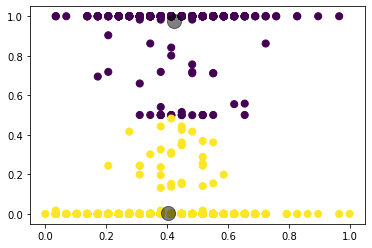

In [48]:
plt.scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [49]:
np.unique(kmeans.labels_)

array([0, 1], dtype=int32)

In [50]:
n_zeros = np.count_nonzero(kmeans.labels_==0)
n_zeros

599

In [24]:
from sklearn.cluster import KMeans

cluster_centers = [[1, 1], [0, 0]]

kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster_centers)

kmeans.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [39]:
sum(kmeans.predict(X))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


2241

Build ML model for each of these clusters

In [51]:
X_train.index

Int64Index([ 642,  700,  226, 1697, 1010, 1572,  776, 1730, 2826, 2228,
            ...
            1482,  330, 1238,  466, 2169, 1638, 1095, 1130, 1294,  860],
           dtype='int64', length=2400)

In [52]:
X_train.index[kmeans.labels_==1]

Int64Index([ 642,  700,  226, 1010, 1572,  776, 1730, 2826, 2228, 2794,
            ...
            2135, 1482,  330, 1238,  466, 2169, 1638, 1130, 1294,  860],
           dtype='int64', length=1801)

In [55]:
X_train.index[kmeans.labels_==1]

Int64Index([ 642,  700,  226, 1010, 1572,  776, 1730, 2826, 2228, 2794,
            ...
            2135, 1482,  330, 1238,  466, 2169, 1638, 1130, 1294,  860],
           dtype='int64', length=1801)

In [60]:
X = X.to_numpy()

In [61]:
X[X_train.index[kmeans.labels_==1]]

array([[0.27586207, 0.        ],
       [0.55172414, 0.        ],
       [0.37931034, 0.        ],
       ...,
       [0.44827586, 0.        ],
       [0.4137931 , 0.        ],
       [0.48275862, 0.        ]])

In [62]:
X[X_train.index[kmeans.labels_== 0]]

array([[0.37931034, 1.        ],
       [0.44827586, 1.        ],
       [0.44827586, 0.5155217 ],
       ...,
       [0.44827586, 1.        ],
       [0.44827586, 1.        ],
       [0.4137931 , 1.        ]])

In [101]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 

X_train_C1= X[X_train.index[kmeans.labels_== 0]]

y_train_C1 = y[y_train.index[kmeans.labels_== 0]]

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_C1, y_train_C1)
 
# performing predictions on the test dataset
pred = clf.predict(X_train_C1)

# X_test.index[kmeans.predict(X_test.to_numpy()) == 0]
X_test_C1 = X[X_test.index[kmeans.predict(X_test.to_numpy()) == 0]]
y_test_C1 = y[y_test.index[kmeans.predict(X_test.to_numpy()) == 0]]
pred = clf.predict(X_test_C1)
# metrics are used to find accuracy or error
from sklearn import metrics 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_C1, pred))

ACCURACY OF THE MODEL:  0.6509803921568628


In [102]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 50) 

X_train_C1= X[X_train.index[kmeans.labels_== 1]]

y_train_C1 = y[y_train.index[kmeans.labels_== 1]]

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_C1, y_train_C1)
 
# performing predictions on the test dataset
pred = clf.predict(X_train_C1)

# X_test.index[kmeans.predict(X_test.to_numpy()) == 0]
X_test_C1 = X[X_test.index[kmeans.predict(X_test.to_numpy()) == 1]]
y_test_C1 = y[y_test.index[kmeans.predict(X_test.to_numpy()) == 1]]
pred = clf.predict(X_test_C1)
# metrics are used to find accuracy or error
from sklearn import metrics 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_C1, pred))

ACCURACY OF THE MODEL:  1.0


In [103]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 50) 

X_train_C1= X[X_train.index[kmeans.labels_== 2]]

y_train_C1 = y[y_train.index[kmeans.labels_== 2]]

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_C1, y_train_C1)
 
# performing predictions on the test dataset
pred = clf.predict(X_train_C1)

# X_test.index[kmeans.predict(X_test.to_numpy()) == 0]
X_test_C1 = X[X_test.index[kmeans.predict(X_test.to_numpy()) == 2]]
y_test_C1 = y[y_test.index[kmeans.predict(X_test.to_numpy()) == 2]]
pred = clf.predict(X_test_C1)
# metrics are used to find accuracy or error
from sklearn import metrics 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_C1, pred))

ACCURACY OF THE MODEL:  0.6594594594594595


In [209]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 50) 

X_train_C1= X[X_train.index[kmeans.labels_== 3]]

y_train_C1 = y[y_train.index[kmeans.labels_== 3]]

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_C1, y_train_C1)
 
# performing predictions on the test dataset
pred = clf.predict(X_train_C1)

# X_test.index[kmeans.predict(X_test.to_numpy()) == 0]
X_test_C1 = X[X_test.index[kmeans.predict(X_test.to_numpy()) == 3]]
y_test_C1 = y[y_test.index[kmeans.predict(X_test.to_numpy()) == 3]]
pred = clf.predict(X_test_C1)
# metrics are used to find accuracy or error
from sklearn import metrics 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_C1, pred))

ACCURACY OF THE MODEL:  0.7777777777777778


In [65]:
(0.6568181818181819 + 1)/2

0.8284090909090909

In [69]:
(0.6522727272727272+1)/2

0.8261363636363637

In [73]:
(1 + 0.625)/2

0.8125

In [79]:
(0.6590909090909091 + 1)/2

0.8295454545454546

In [88]:
(0.6568181818181819+1)/2

0.8284090909090909

In [216]:
(0.6630434782608695+1+0.6484375)/3

0.7704936594202899

In [99]:
(0.6509803921568628+1+0.6594594594594595)/3

0.7701466172054406

In [105]:
(0.6509803921568628 + 1+ 0.6694594594594595)/3

0.773479950538774

In [108]:
(0.6609803921568628 + 1+ 0.6694594594594595)/3

0.7768132838721075

In [110]:
(0.6709803921568628 + 1+ 0.6694594594594595)/3

0.7801466172054408

In [210]:
(0.7777777777777778 + 1 + 0.6496062992125984+ 0.6648351648351648 )/4

0.7730548104563851

In [111]:
(0.7677777777777778 + 1 + 0.6396062992125984+ 0.6548351648351648 )/4

0.7655548104563853

In [112]:
(0.7577777777777778 + 1 + 0.6296062992125984+ 0.6548351648351648 )/4

0.7605548104563852

In [114]:
(0.7877777777777778 + 1 + 0.6196062992125984+ 0.6148351648351648 )/4

0.7555548104563853

In [115]:
(0.7677777777777778 + 1 + 0.6296062992125984+ 0.6048351648351648 )/4

0.7505548104563853

In [180]:
X_test.index

Int64Index([1801, 1190, 1817,  251, 2505, 1117, 1411, 2113,  408, 2579,
            ...
            2781, 2863, 2587, 1399, 1370,  104, 2087,  599, 1756, 1323],
           dtype='int64', length=600)

In [183]:
X_test.index[kmeans.predict(X_test.to_numpy()) == 0]

Int64Index([1801, 1817,  251, 2505, 1411, 2579, 1763, 1073, 2895, 1241,
            ...
             859,  407, 2407, 2233, 1587, 2569, 2781, 1399, 2087,  599],
           dtype='int64', length=160)

In [186]:
X[X_test.index[kmeans.predict(X_test.to_numpy()) == 0]].shape

(160, 2)

In [187]:
y_test_C1 = y[y_test.index[kmeans.predict(X_test.to_numpy()) == 0]]
y_test_C1

1801    0.0
1817    0.0
251     0.0
2505    0.0
1411    0.0
       ... 
2569    0.0
2781    0.0
1399    0.0
2087    0.0
599     0.0
Name: Matched, Length: 160, dtype: float64